In [1]:
import pandas as pd

# Import Data

In [2]:
suicide_pre = pd.read_csv('data/suicidewatch_pre_features_tfidf_256.csv')
suicide_post = pd.read_csv('data/suicidewatch_post_features_tfidf_256.csv')

# High-Level Look at Datasets

## Preface

These datasets contain a very large number of features. For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [3]:
suicide_pre = suicide_pre.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
suicide_post = suicide_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## 'Pre' Dataset

In [4]:
suicide_pre.head(3)

,subreddit,author,date,post,substance_use_total
0,suicidewatch,pleasethinkIogically,2018/11/28,"I want to kill myself, but my ex (who I would ...",0
1,suicidewatch,sirgregoryelliott,2018/11/28,I’ve been slowly turning to the dark side. Jok...,1
2,suicidewatch,ninja1635,2018/11/28,I'm about I'm a very talkative person and real...,2


In [5]:
suicide_pre.tail(3)

,subreddit,author,date,post,substance_use_total
19941,suicidewatch,frickmeup666,2018/12/01,The harder I swim the faster I sink Just feel ...,0
19942,suicidewatch,Sadgirltimes,2018/12/01,Reasons to live I'm not in a good place right ...,0
19943,suicidewatch,anon131318,2018/12/01,just wanna die already life is boring and depr...,0


In [6]:
print(f'Total number of records in this dataset: {len(suicide_pre)}')
suicide_pre.describe()

Total number of records in this dataset: 19944


,substance_use_total
count,19944.000000
mean,0.384928
std,0.895982
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,21.000000


So it doesn't look like we're missing any values in the `suicidewatch_pre_features_tfidf_256.csv` dataset.
Let's take a quick look at the distribution of number of mentions of substance use per post.

<AxesSubplot:ylabel='Frequency'>

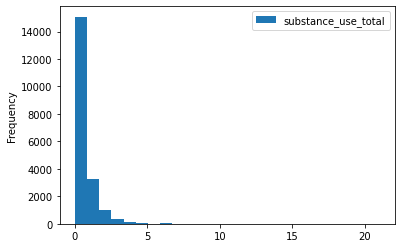

In [7]:
suicide_pre.plot.hist(bins=25)

## 'Post' Dataset

In [8]:
suicide_post.head(3)

,subreddit,author,date,post,substance_use_total
0,suicidewatch,Dancing_Angel,2020/01/01,How do you guys feel less dead inside? I've go...,0
1,suicidewatch,wjufh,2020/01/01,i want to get help but i don’t know how my par...,0
2,suicidewatch,Effective-Letterhead,2020/01/01,I can’t stop myself from loving this fictional...,0


In [9]:
suicide_post.tail(3)

,subreddit,author,date,post,substance_use_total
21407,suicidewatch,acshit,2020/04/20,I’m going to fucking kill myself 18 years too ...,0
21408,suicidewatch,Haunting-Maybe,2020/04/20,I’m going to pieces All I’ve done for about a ...,2
21409,suicidewatch,seafoamangeltears,2020/04/20,sigh it's been a wild couple of weeks...i'm ve...,0


In [10]:
print(f'Total number of records in this dataset: {len(suicide_post)}')
suicide_post.describe()

Total number of records in this dataset: 21410


,substance_use_total
count,21410.000000
mean,0.402382
std,0.901949
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,16.000000


So it doesn't look like we're missing any values in the `suicidewatch_post_features_tfidf_256.csv` dataset.
Let's take a quick look at the distribution of number of mentions of substance use per post.

<AxesSubplot:ylabel='Frequency'>

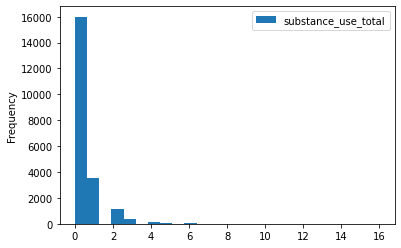

In [11]:
suicide_post.plot.hist(bins=25)

## High-Level Comparison of Pre-Post Datasets

In [12]:
pd.concat([suicide_pre.describe(), suicide_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,19944.000000,21410.000000
mean,0.384928,0.402382
std,0.895982,0.901949
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,21.000000,16.000000


As you can see from the table above, there are roughly an equal number records in the 'post' dataset as there are in the 'pre' dataset. This is surprising given that the 'post' dataset covers a far shorter period of time that the 'pre' dataset. In any case, a simple comparison of the means of these two datasets should be taken with a grain of salt. A Z-test of comparison of means may be a good place to start with this dataset to understand if there is any significant difference between the means of these datasets

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(suicide_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(suicide_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 19944
Number of unique authors (posters) in 'post' dataset: 21410


So it looks as though **each** record/observation in each dataset is associated with a unique reddit user - which is great! That way we know we don't have - for example - an individual redditor who is contributing a disproportionate amount to our dataset. *Though* - it does then raise the question of how and why the assemblers of this dataset achieved this author-observation uniqueness.